In [875]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_rows', None)

In [876]:
data = []
with open('/content/WhatsApp Chat with +92 321 5063473.txt','r') as f:
  for i in f.readlines():
    match = re.search(r"(\d+/\d+/\d+),\s*(\d+:\d+\s*(AM|PM))\s*-\s*((\+92 321 5063473|Hammadulmustafa)):\s*(.+)" ,i)
    if match:
      date = match.group(1)
      time = match.group(2)
      sender = match.group(4)
      message = match.group(6)
      data.append([date,time,sender,message])

df = pd.DataFrame(data=data,columns=['date','time','sender','message'])


In [877]:
df['date'] = pd.to_datetime(df['date'])

/tmp/ipython-input-3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [878]:
df['time'] = pd.to_datetime(df['time'])

/tmp/ipython-input-4237337754.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


In [879]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     234 non-null    datetime64[ns]
 1   time     234 non-null    datetime64[ns]
 2   sender   234 non-null    object        
 3   message  234 non-null    object        
dtypes: datetime64[ns](2), object(2)
memory usage: 7.4+ KB


# Data Cleaning

Remove mediaommited messages

In [880]:
df[df['message'].str.contains(r"<Media omitted>",regex=True)].head()

,date,time,sender,message
2,2024-05-04,2025-08-02 12:23:00,Hammadulmustafa,<Media omitted>
7,2024-05-04,2025-08-02 14:18:00,Hammadulmustafa,<Media omitted>
8,2024-06-25,2025-08-02 00:16:00,+92 321 5063473,<Media omitted>
9,2024-06-25,2025-08-02 00:31:00,Hammadulmustafa,<Media omitted>
10,2024-06-25,2025-08-02 14:45:00,Hammadulmustafa,<Media omitted>


In [881]:
df['message']=df['message'].replace("<Media omitted>",np.nan)

In [882]:
df.isnull().sum()

,0
date,0
time,0
sender,0
message,45


In [883]:
df.dropna(inplace=True)

Convert text to lower

In [884]:
df['message'] = df['message'].apply(lambda x:x.lower())

In [885]:
df['message'].head()

,message
0,this is my number (saleem)
1,okay thank you
3,alhamdulilah
4,great
5,it's very interesting to see how he paces his ...


Remove trailing spaces

In [886]:
df['message'] = df['message'].apply(lambda x:x.strip())

In [887]:
df['message'].head()

,message
0,this is my number (saleem)
1,okay thank you
3,alhamdulilah
4,great
5,it's very interesting to see how he paces his ...


Remove Urls

In [888]:
df[df['message'].str.contains(r"(https://\S+|www.\S+)",regex=True)].head()

/tmp/ipython-input-2807632596.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['message'].str.contains(r"(https://\S+|www.\S+)",regex=True)].head()


,date,time,sender,message
73,2024-11-25,2025-08-02 20:13:00,+92 321 5063473,https://summerofcode.withgoogle.com/
115,2025-05-13,2025-08-02 16:55:00,Hammadulmustafa,https://cs50.harvard.edu/python/2022/project/
133,2025-05-16,2025-08-02 20:59:00,Hammadulmustafa,https://www.edx.org/learn/artificial-intellige...
140,2025-05-16,2025-08-02 21:27:00,+92 321 5063473,https://youtu.be/tecdj4jux7o?feature=shared
144,2025-05-16,2025-08-02 21:30:00,+92 321 5063473,https://tomblomfield.com/post/1743528547367/th...


In [889]:
df['message'] = df['message'].str.replace(r"(https://\S+|www.\S+)","",regex=True)

In [890]:
df[df['message'].str.contains(r"(https://\S+|www.\S+)")].head()

/tmp/ipython-input-1158489881.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['message'].str.contains(r"(https://\S+|www.\S+)")].head()


,date,time,sender,message


In [891]:
df['message']= df['message'].replace("",np.nan)

In [892]:
df.isnull().sum()

,0
date,0
time,0
sender,0
message,9


In [893]:
df.dropna(inplace=True)

Expand Abbreviations

In [894]:

def find_abbreviations():
  l = []
  for i in df['message']:
    match = re.search(r"(\w+'\w+)",i)
    if match:
      l.append(match.group(1))
  return l

In [895]:
print(set(find_abbreviations()))

{"don't", "haven't", "hammad's", "that's", "world's", "can't", "couldn't", "let's", "programmer's", "i'll", "doesn't", "ain't", "i'm", "it's"}


In [896]:
def remove_abbreviations(text):
  text = re.sub("don't","do not",text)
  text = re.sub("haven't","have not",text)
  text = re.sub("hammad's","hammad",text)
  text = re.sub("that's","that is",text)
  text = re.sub("world's","worlds",text)
  text = re.sub("can't","can not",text)
  text = re.sub("couldn't","could not",text)
  text = re.sub("let's","lets",text)
  text = re.sub("programmer's","programmers",text)
  text = re.sub("i'll","i will",text)
  text = re.sub("doesn't","does not",text)
  text = re.sub("ain't","am not",text)
  text = re.sub("i'm","i am",text)
  text = re.sub("it's","it is",text)

  return text

In [897]:
df[df['message'].str.contains(r"^\w+'\w+")].head()

,date,time,sender,message
5,2024-05-04,2025-08-02 12:45:00,+92 321 5063473,it's very interesting to see how he paces his ...
16,2024-06-25,2025-08-02 17:58:00,+92 321 5063473,it's a graveyard for the professionals and i f...
24,2024-06-26,2025-08-02 13:37:00,Hammadulmustafa,it's a painful truth
163,2025-05-25,2025-08-02 16:24:00,+92 321 5063473,that's a very brave effort indeed and do you f...
166,2025-05-27,2025-08-02 17:05:00,+92 321 5063473,don't worry. it's normal and as you keep pract...


In [898]:
df['message'] = df['message'].apply(remove_abbreviations)

Spelling correction

In [899]:
from textblob import TextBlob
def correct_spelling(text):
  return str(TextBlob(text).correct())

In [900]:
df['message'] = df['message'].apply(correct_spelling)

Remove Puntuation

In [901]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [902]:
def remove_punctuation(text):
  for i in string.punctuation:
    if i in text:
      text = text.replace(i,"")
  return text

In [903]:
df['message'] = df['message'].apply(remove_punctuation)

In [904]:
df.head()

,date,time,sender,message
0,2024-04-27,2025-08-02 18:29:00,+92 321 5063473,this is my number salem
1,2024-04-27,2025-08-02 19:08:00,Hammadulmustafa,okay thank you
3,2024-05-04,2025-08-02 12:23:00,Hammadulmustafa,alhamdulilah
4,2024-05-04,2025-08-02 12:42:00,+92 321 5063473,great
5,2024-05-04,2025-08-02 12:45:00,+92 321 5063473,it is very interesting to see how he paces his...


Tokenization




In [905]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [906]:
from nltk.tokenize import word_tokenize
df['tokenized_message'] = df['message'].apply(word_tokenize)

In [907]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 233
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               180 non-null    datetime64[ns]
 1   time               180 non-null    datetime64[ns]
 2   sender             180 non-null    object        
 3   message            180 non-null    object        
 4   tokenized_message  180 non-null    object        
dtypes: datetime64[ns](2), object(3)
memory usage: 8.4+ KB


Remove stop words

In [908]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [909]:
from nltk.corpus import stopwords
# stopwords.words('english')

In [910]:
def remove_stopwords(text):
  ans = []
  for i in text:
    if i not in stopwords.words('english'):
      ans.append(i)
  return ans



In [911]:
df['final_tokenized_message'] = df['tokenized_message'].apply(remove_stopwords)

In [912]:
df.head()

,date,time,sender,message,tokenized_message,final_tokenized_message
0,2024-04-27,2025-08-02 18:29:00,+92 321 5063473,this is my number salem,"[this, is, my, number, salem]","[number, salem]"
1,2024-04-27,2025-08-02 19:08:00,Hammadulmustafa,okay thank you,"[okay, thank, you]","[okay, thank]"
3,2024-05-04,2025-08-02 12:23:00,Hammadulmustafa,alhamdulilah,[alhamdulilah],[alhamdulilah]
4,2024-05-04,2025-08-02 12:42:00,+92 321 5063473,great,[great],[great]
5,2024-05-04,2025-08-02 12:45:00,+92 321 5063473,it is very interesting to see how he paces his...,"[it, is, very, interesting, to, see, how, he, ...","[interesting, see, paces, career, would, like,..."


# EDA(exploratory data analysis)

In [913]:
df['day'] = df['date'].dt.day_name()

In [914]:
df.head()

,date,time,sender,message,tokenized_message,final_tokenized_message,day
0,2024-04-27,2025-08-02 18:29:00,+92 321 5063473,this is my number salem,"[this, is, my, number, salem]","[number, salem]",Saturday
1,2024-04-27,2025-08-02 19:08:00,Hammadulmustafa,okay thank you,"[okay, thank, you]","[okay, thank]",Saturday
3,2024-05-04,2025-08-02 12:23:00,Hammadulmustafa,alhamdulilah,[alhamdulilah],[alhamdulilah],Saturday
4,2024-05-04,2025-08-02 12:42:00,+92 321 5063473,great,[great],[great],Saturday
5,2024-05-04,2025-08-02 12:45:00,+92 321 5063473,it is very interesting to see how he paces his...,"[it, is, very, interesting, to, see, how, he, ...","[interesting, see, paces, career, would, like,...",Saturday


In [915]:
df['message_length'] = df['message'].str.len()

In [916]:
df.head()

,date,time,sender,message,tokenized_message,final_tokenized_message,day,message_length
0,2024-04-27,2025-08-02 18:29:00,+92 321 5063473,this is my number salem,"[this, is, my, number, salem]","[number, salem]",Saturday,23
1,2024-04-27,2025-08-02 19:08:00,Hammadulmustafa,okay thank you,"[okay, thank, you]","[okay, thank]",Saturday,14
3,2024-05-04,2025-08-02 12:23:00,Hammadulmustafa,alhamdulilah,[alhamdulilah],[alhamdulilah],Saturday,12
4,2024-05-04,2025-08-02 12:42:00,+92 321 5063473,great,[great],[great],Saturday,5
5,2024-05-04,2025-08-02 12:45:00,+92 321 5063473,it is very interesting to see how he paces his...,"[it, is, very, interesting, to, see, how, he, ...","[interesting, see, paces, career, would, like,...",Saturday,127


Most Talks on which day

<Axes: xlabel='day'>

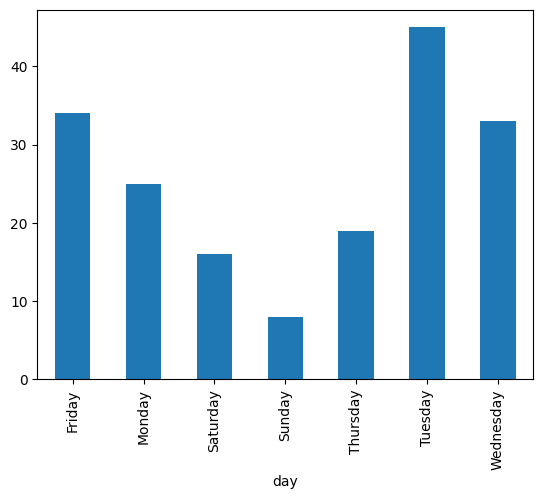

In [917]:
df.groupby('day')['message'].count().plot(kind='bar')

Most talks at which time

In [920]:
def current_time(hours):
  # hours = time.dt.hour
  if hours == 00:
    return f"Midnight"
  elif hours <  11 and hours > 5:
    return f"Morning"
  elif hours == 12:
    return f"Noon (Midday)"
  elif hours > 12 and hours < 17:
    return f"Afternoon"
  elif hours > 17 and hours < 20:
    return f"Evening"
  elif hours > 20:
    return f"Night"
  else:
    return f"Late Night"

In [921]:
df['parts_of_day'] = df['time'].dt.hour.apply(current_time)

<Axes: xlabel='parts_of_day'>

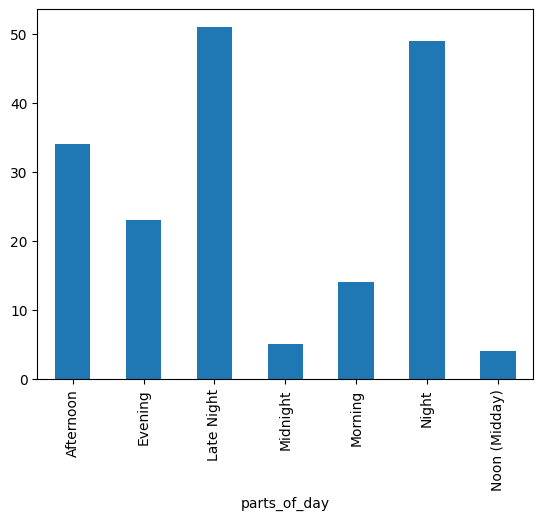

In [922]:
df.groupby('parts_of_day')['message'].count().plot(kind='bar')

Average gap between each message

In [923]:
message_gap = df['date'] - df['date'].shift(1)

In [924]:
message_gap.mean()

Timedelta('2 days 08:42:54.301675977')

Lenght of message by day

<Axes: xlabel='day'>

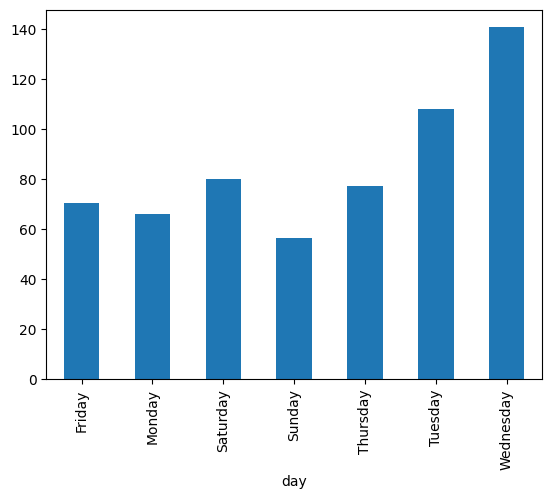

In [925]:
df.groupby('day')['message_length'].mean().plot(kind='bar')

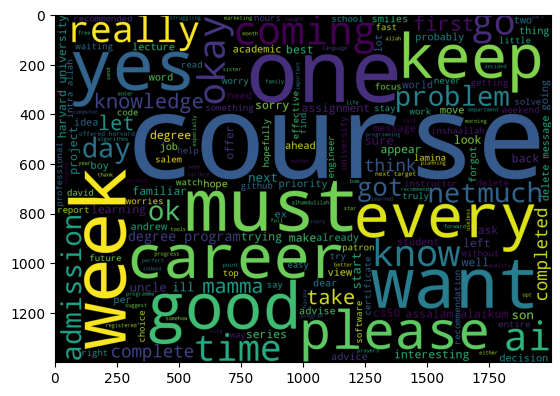

In [926]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = WordCloud(width=2000,height=1400).generate(' '.join(df['final_tokenized_message'].sum()))
plt.imshow(word_cloud)

# Vectorization

In [927]:
df['message_for_vectorization'] = df['final_tokenized_message'].apply(lambda x:" ".join(x))

In [928]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=50,ngram_range=(1,1))
bag_of_words = count_vectorizer.fit_transform(df['message_for_vectorization'])
vectorized_data = pd.DataFrame(data=bag_of_words.toarray(),columns=count_vectorizer.get_feature_names_out())

In [929]:
vectorized_data.head()

,admission,ai,also,assalam,back,career,coming,complete,completed,course,...,son,sure,take,think,time,uncle,university,want,week,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Perform PCA to shrink data to 2d

In [930]:
from sklearn.decomposition import  PCA
pca=  PCA(n_components=2)
shrinked_data = pca.fit_transform(vectorized_data.values)


In [931]:
import seaborn as sns

<Axes: >

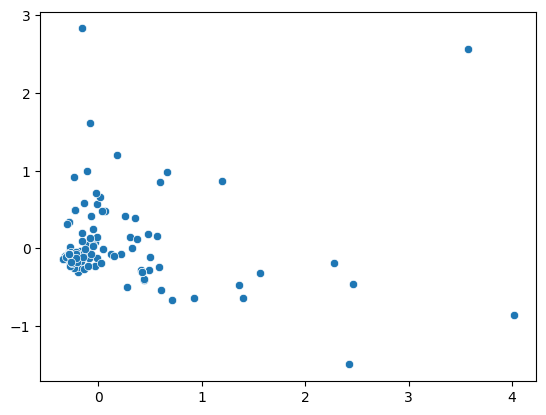

In [932]:
sns.scatterplot(x=shrinked_data[:,0],y=shrinked_data[:,1])

In [934]:
df.head()

,date,time,sender,message,tokenized_message,final_tokenized_message,day,message_length,parts_of_day,message_for_vectorization
0,2024-04-27,2025-08-02 18:29:00,+92 321 5063473,this is my number salem,"[this, is, my, number, salem]","[number, salem]",Saturday,23,Evening,number salem
1,2024-04-27,2025-08-02 19:08:00,Hammadulmustafa,okay thank you,"[okay, thank, you]","[okay, thank]",Saturday,14,Evening,okay thank
3,2024-05-04,2025-08-02 12:23:00,Hammadulmustafa,alhamdulilah,[alhamdulilah],[alhamdulilah],Saturday,12,Noon (Midday),alhamdulilah
4,2024-05-04,2025-08-02 12:42:00,+92 321 5063473,great,[great],[great],Saturday,5,Noon (Midday),great
5,2024-05-04,2025-08-02 12:45:00,+92 321 5063473,it is very interesting to see how he paces his...,"[it, is, very, interesting, to, see, how, he, ...","[interesting, see, paces, career, would, like,...",Saturday,127,Noon (Midday),interesting see paces career would like contes...
